In [28]:
# Create Latitude and Longitude Combinations

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime



In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# 6.1.5 Generate Random World Cities
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [30]:
############################################ 6.2.6 Get the City Weather Data ############################################
# Import your Requests Library and the weather_api_key
from config import weather_api_key
import requests

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | vestmannaeyjar
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | knysna
Processing Record 7 of Set 1 | san carlos
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | sosnovo-ozerskoye
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | zaraza
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | oktyabrskiy
Processing Record 21 of Set 1 | grindavik
Processing Record 22 of Set 1 | 

Processing Record 37 of Set 4 | suntar
Processing Record 38 of Set 4 | esperance
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | santa cruz cabralia
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | fairhope
Processing Record 43 of Set 4 | murgab
Processing Record 44 of Set 4 | dubbo
Processing Record 45 of Set 4 | vanimo
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | megion
Processing Record 48 of Set 4 | richards bay
Processing Record 49 of Set 4 | udachnyy
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | ishigaki
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | karratha
Processing Record 4 of Set 5 | venado tuerto
Processing Record 5 of Set 5 | candolim
Processing Record 6 of Set 5 | henties bay
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | maceio
Processing Record 9 of Set 5 | san miguel


Processing Record 29 of Set 8 | maine-soroa
Processing Record 30 of Set 8 | port pirie
Processing Record 31 of Set 8 | acari
Processing Record 32 of Set 8 | changping
Processing Record 33 of Set 8 | ketchikan
Processing Record 34 of Set 8 | itoman
Processing Record 35 of Set 8 | fonte boa
Processing Record 36 of Set 8 | jangipur
Processing Record 37 of Set 8 | agirish
Processing Record 38 of Set 8 | nykoping
Processing Record 39 of Set 8 | sungaipenuh
Processing Record 40 of Set 8 | nuuk
Processing Record 41 of Set 8 | rungata
City not found. Skipping...
Processing Record 42 of Set 8 | iqaluit
Processing Record 43 of Set 8 | catuday
Processing Record 44 of Set 8 | makaha
Processing Record 45 of Set 8 | tessalit
Processing Record 46 of Set 8 | kalaleh
Processing Record 47 of Set 8 | san patricio
Processing Record 48 of Set 8 | la palma
Processing Record 49 of Set 8 | armeria
Processing Record 50 of Set 8 | nurota
Processing Record 1 of Set 9 | duz
City not found. Skipping...
Processing 

Processing Record 15 of Set 12 | prince rupert
Processing Record 16 of Set 12 | kerema
Processing Record 17 of Set 12 | vila
Processing Record 18 of Set 12 | falealupo
City not found. Skipping...
Processing Record 19 of Set 12 | ha tinh
Processing Record 20 of Set 12 | taveta
Processing Record 21 of Set 12 | guerrero negro
Processing Record 22 of Set 12 | contamana
Processing Record 23 of Set 12 | tigil
Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | san cristobal
Processing Record 26 of Set 12 | songjianghe
Processing Record 27 of Set 12 | adrar
Processing Record 28 of Set 12 | irituia
Processing Record 29 of Set 12 | ewa beach
Processing Record 30 of Set 12 | kemise
Processing Record 31 of Set 12 | paita
Processing Record 32 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 33 of Set 12 | santo domingo
Processing Record 34 of Set 12 | maarianhamina
Processing Record 35 of Set 12 | sola
Processing Record 36 of Set 12 | hami
Processing Rec

In [32]:
print(len(city_data))

541


In [33]:
#############################  6.2.7 - Create a DataFrame of City Weather Data  #############################
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.02,147.27,300.05,83,100,4.78,PG,2020-08-01 15:33:25
1,Bambous Virieux,-20.34,57.76,296.15,78,75,4.60,MU,2020-08-01 15:33:25
2,Punta Arenas,-53.15,-70.92,276.15,93,75,2.10,CL,2020-08-01 15:33:26
3,Vestmannaeyjar,63.44,-20.27,287.15,87,40,6.70,IS,2020-08-01 15:33:26
4,Mataura,-46.19,168.86,281.86,86,73,2.05,NZ,2020-08-01 15:33:26
5,Knysna,-34.04,23.05,288.15,82,0,4.10,ZA,2020-08-01 15:33:26
6,San Carlos,9.66,-68.58,301.32,75,13,2.50,VE,2020-08-01 15:33:26
7,Rikitea,-23.12,-134.97,296.06,81,100,2.30,PF,2020-08-01 15:33:26
8,Qaanaaq,77.48,-69.36,277.43,69,27,3.09,GL,2020-08-01 15:33:26
9,Yellowknife,62.46,-114.35,293.71,72,75,5.70,CA,2020-08-01 15:33:26


In [36]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2020-08-01 15:33:25,-2.02,147.27,300.05,83,100,4.78
1,Bambous Virieux,MU,2020-08-01 15:33:25,-20.34,57.76,296.15,78,75,4.60
2,Punta Arenas,CL,2020-08-01 15:33:26,-53.15,-70.92,276.15,93,75,2.10
3,Vestmannaeyjar,IS,2020-08-01 15:33:26,63.44,-20.27,287.15,87,40,6.70
4,Mataura,NZ,2020-08-01 15:33:26,-46.19,168.86,281.86,86,73,2.05
5,Knysna,ZA,2020-08-01 15:33:26,-34.04,23.05,288.15,82,0,4.10
6,San Carlos,VE,2020-08-01 15:33:26,9.66,-68.58,301.32,75,13,2.50
7,Rikitea,PF,2020-08-01 15:33:26,-23.12,-134.97,296.06,81,100,2.30
8,Qaanaaq,GL,2020-08-01 15:33:26,77.48,-69.36,277.43,69,27,3.09
9,Yellowknife,CA,2020-08-01 15:33:26,62.46,-114.35,293.71,72,75,5.70


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

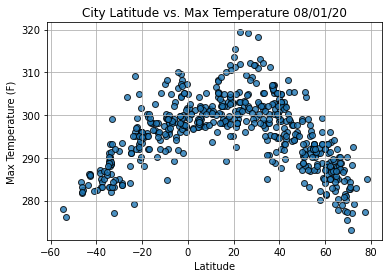

In [40]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

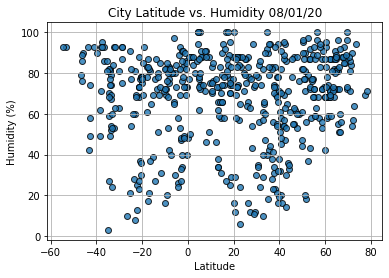

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

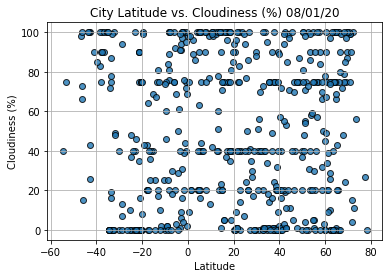

In [42]:
#############################  6.3.3 - Plot Latitude vs. Cloudiness  #############################  

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


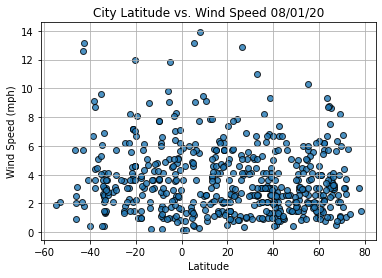

In [43]:
#############################  6.3.4 - Plot Latitude vs. Wind Speed  #############################  
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
